In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from  Find_N_MinMaxValues import Find_N_MaxValues
from  Find_N_MinMaxValues import Find_N_MinValues

# Questão 1
### Operadores Espaciais

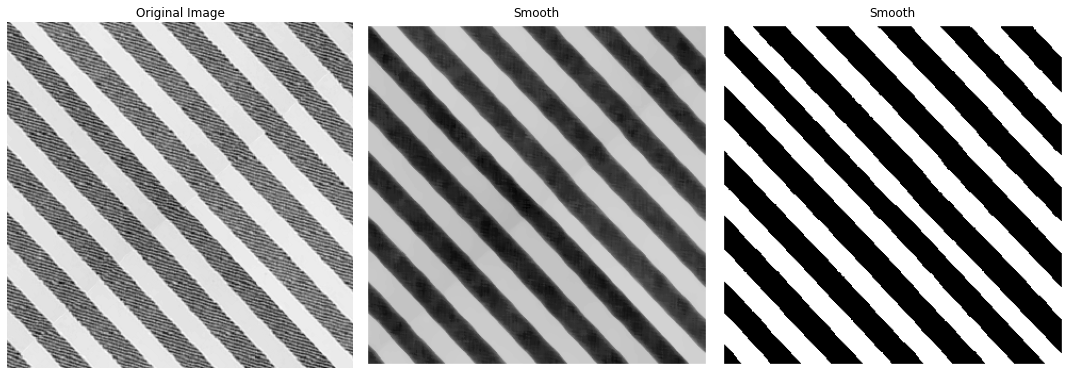

In [206]:
img_ex1 = cv2.imread("Figuras_APS2/Fig1_Tecido5.bmp", cv2.IMREAD_GRAYSCALE)
(h, w) = img_ex1.shape

m = 9
d= int((m-1)/2)

img_filter=np.full((h,w),255,dtype = "uint8")

for i in range(d,h-d):
    for j in range (d,w-d):
        secao_img = img_ex1[i-d:i+d+1,j-d:j+d+1]
        img_filter[i,j]=np.median(secao_img)

ex1_bin = np.where(img_filter < 205, 0, 255).astype(np.uint8)


plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(img_ex1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_filter, cmap='gray')
plt.title('Smooth')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(ex1_bin, cmap='gray')
plt.title('Smooth')
plt.axis('off')

plt.tight_layout()
plt.show()

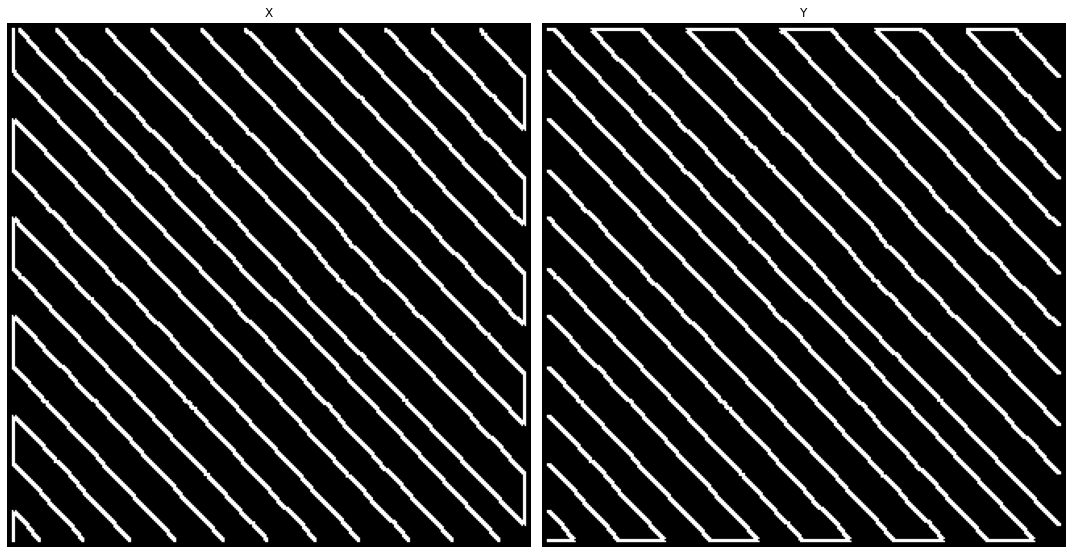

In [207]:
m = 3
d= int((m-1)/2)
kernel_Y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype="int16")
kernel_X = np.array([[1,0,-1],[1,0,-1],[1,0,-1]],dtype="int16")

img_filter_X=np.zeros((h,w),dtype = "uint8")
img_filter_Y=np.zeros((h,w),dtype = "uint8")

for i in range(d,h-d):
    for j in range (d,w-d):
        secao_img = ex1_bin[i-d:i+d+1,j-d:j+d+1]

        product =kernel_X*secao_img
        sum = product.sum()
        img_filter_X[i,j]= abs(sum).astype("uint8")
        
        product2 =kernel_Y*secao_img
        sum2 = product2.sum()
        img_filter_Y[i,j]= abs(sum2).astype("uint8")

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img_filter_X, cmap='gray')
plt.title('X')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_filter_Y, cmap='gray')
plt.title('Y')
plt.axis('off')


plt.tight_layout()
plt.show()

In [208]:
Vertical = 0
Horizontal = 0

for i in range(h):
    for j in range (w):
        if img_filter_X[i,j]>0:
            Vertical+=1
for i in range(h):
    for j in range (w):
        if img_filter_Y[i,j]>0:
            Horizontal+=1

indicador =Vertical-Horizontal
print(indicador)
if indicador<-2000:
    print("Horizontal")
elif indicador>=-2000 and indicador<2000:
    print("Diagonal")
else:
    print("Vertical")

18
Diagonal


# Questão 2
### Reconhecimento de padrão

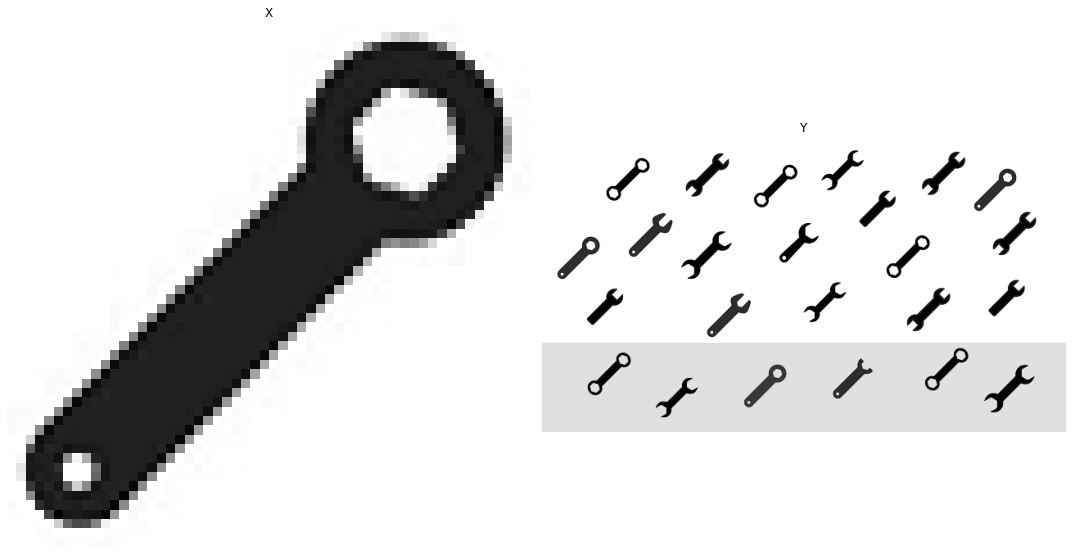

In [209]:
img_Padrao= cv2.imread("Figuras_APS2/Fig2_Padrao_u8.bmp", cv2.IMREAD_GRAYSCALE)
img_Ferramentas = cv2.imread("Figuras_APS2/Fig2_Ferramentas_u8.bmp", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img_Padrao, cmap='gray')
plt.title('X')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_Ferramentas, cmap='gray')
plt.title('Y')
plt.axis('off')


plt.tight_layout()
plt.show()

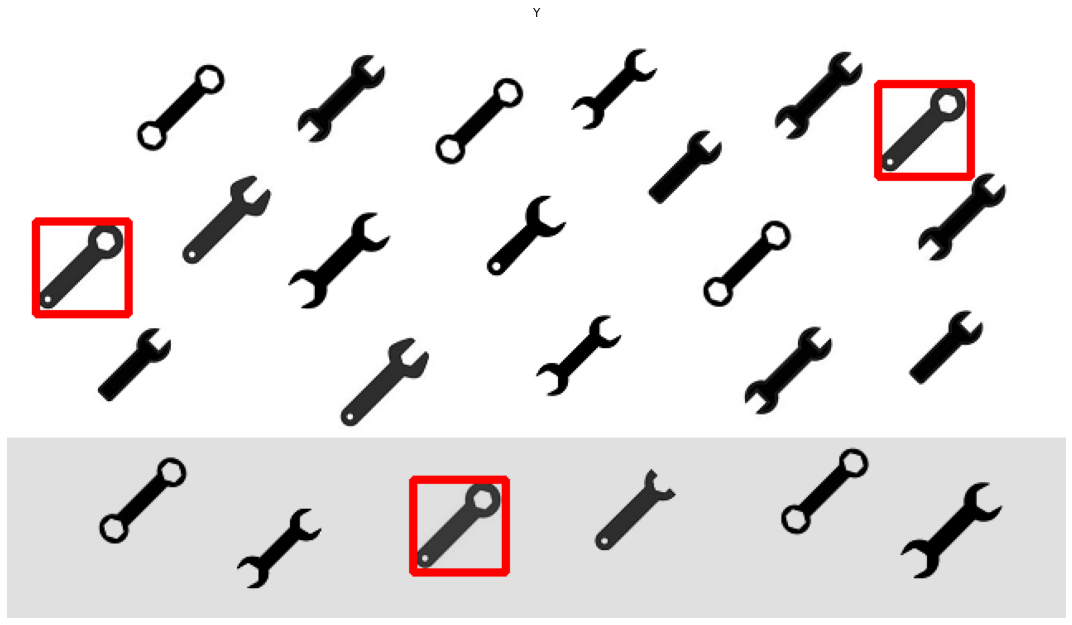

In [210]:

(m,n) = img_Padrao.shape
(h,w) = img_Ferramentas.shape

d1= int((m)/2)
d2= int((n)/2)


img_Erros=np.zeros((h,w),dtype = "float32")

img_Ferramentas_float = img_Ferramentas/255
img_Padrao_float= img_Padrao/255

for i in range(d1,h-d1):
    for j in range (d2,w-d2):
        secao_img = img_Ferramentas_float[i-d1:i+d1,j-d2:j+d2]

        Multiplicação_superior = (secao_img*img_Padrao_float)
        Soma_superior = Multiplicação_superior.sum()
        Soma_Secao_img_quadrado = (secao_img**2).sum()
        Soma_Padrao_img_quadrado = (img_Padrao_float**2).sum()
        img_Erros[i,j] = Soma_superior/(Soma_Secao_img_quadrado*Soma_Padrao_img_quadrado)**0.5

Lista_Valores=Find_N_MaxValues(img_Erros,3)

img_Ferramentas_rgb =cv2.cvtColor(img_Ferramentas,cv2.COLOR_BGR2RGB)

img_rgb_ret_1 = cv2.rectangle(img_Ferramentas_rgb, (Lista_Valores[0][1]-d2, Lista_Valores[0][0]-d1), (Lista_Valores[0][1]+d2, Lista_Valores[0][0]+d1), (255,0,0), 3)
img_rgb_ret_2 = cv2.rectangle(img_rgb_ret_1, (Lista_Valores[1][1]-d2, Lista_Valores[1][0]-d1), (Lista_Valores[1][1]+d2, Lista_Valores[1][0]+d1), (255,0,0), 3)
img_rgb_ret_3 = cv2.rectangle(img_rgb_ret_2, (Lista_Valores[2][1]-d2, Lista_Valores[2][0]-d1), (Lista_Valores[2][1]+d2, Lista_Valores[2][0]+d1), (255,0,0), 3)


plt.figure(figsize=(15,10))

plt.imshow(img_rgb_ret_3,cmap='gray')
plt.title('Y')
plt.axis('off')


plt.tight_layout()
plt.show()

# Questão 3
### Transformada Geometrica

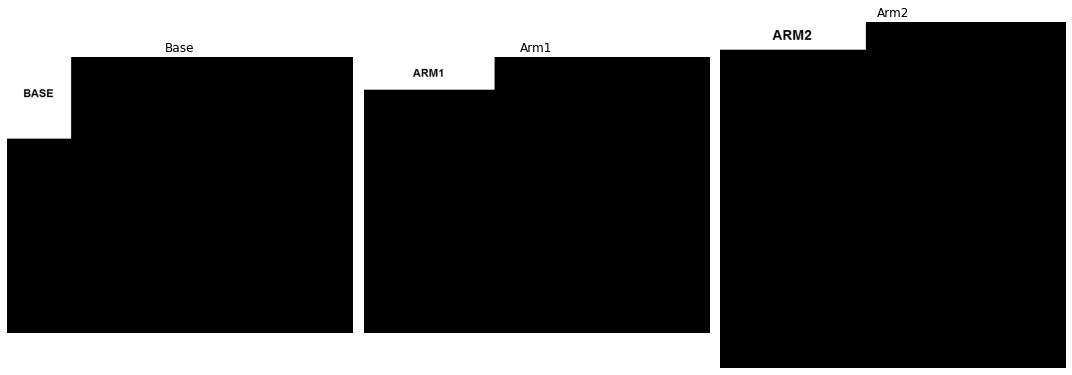

In [211]:
Fig_Base= cv2.imread("Figuras_APS2/Fig3_Base.bmp", cv2.IMREAD_GRAYSCALE)
Fig_Arm1= cv2.imread("Figuras_APS2/Fig3_Arm1.bmp", cv2.IMREAD_GRAYSCALE)
Fig_Arm2= cv2.imread("Figuras_APS2/Fig3_Arm2.bmp", cv2.IMREAD_GRAYSCALE)



plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(Fig_Base, cmap='gray')
plt.title('Base')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Fig_Arm1, cmap='gray')
plt.title('Arm1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(Fig_Arm2, cmap='gray')
plt.title('Arm2')
plt.axis('off')

plt.tight_layout()
plt.show()

In [212]:
(hbase,wbase)=Fig_Base.shape
(harm1,warm1)=Fig_Arm1.shape
(harm2,warm2)=Fig_Arm2.shape
print(hbase,wbase)
print(harm1,warm1)
print(harm2,warm2)

600 750
600 750
600 600


In [213]:
Fig_Arm2_novo = np.zeros((hbase,wbase),dtype = "uint8")
for i in range(harm2):
    for j in range (warm2):
        Fig_Arm2_novo[i,j]=Fig_Arm2[i,j]


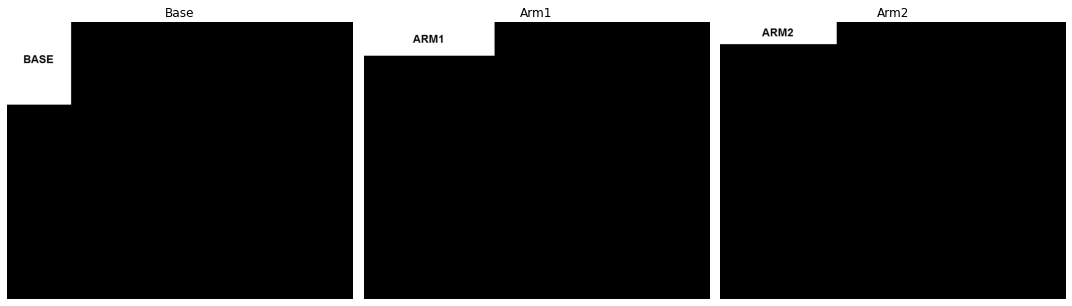

600 750
600 750
600 750


In [214]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(Fig_Base, cmap='gray')
plt.title('Base')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Fig_Arm1, cmap='gray')
plt.title('Arm1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(Fig_Arm2_novo, cmap='gray')
plt.title('Arm2')
plt.axis('off')

plt.tight_layout()
plt.show()

(hbase,wbase)=Fig_Base.shape
(harm1,warm1)=Fig_Arm1.shape
(harm2_novo,warm2_novo)=Fig_Arm2_novo.shape
print(hbase,wbase)
print(harm1,warm1)
print(harm2_novo,warm2_novo)

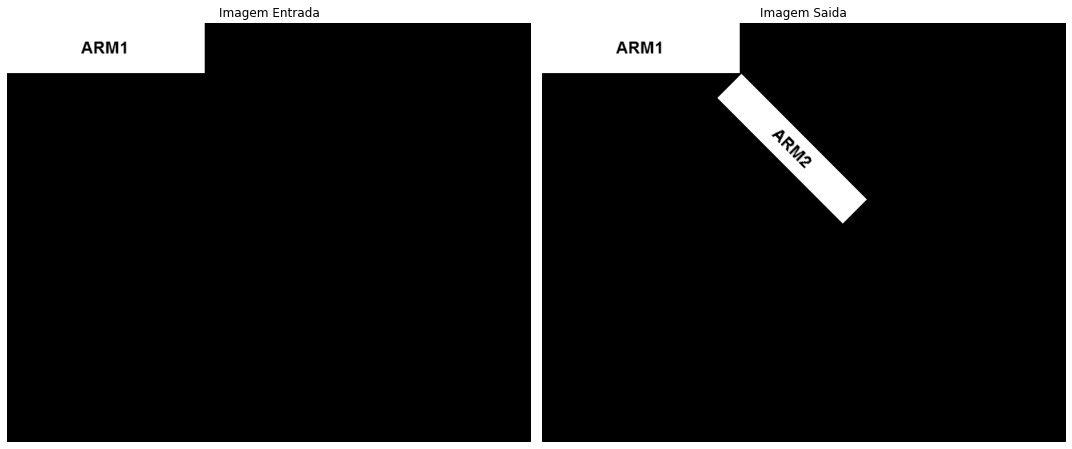

In [215]:
theta1 = 45*np.pi/180
TH=np.array( [[np.cos(theta1), -np.sin(theta1), 285],
    [np.sin(theta1), np.cos(theta1), 75],
    [0, 0, 1]], dtype = np.float32)

TH_inv=np.linalg.inv(TH)
#Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
Fig_Arm1_Arm2 = Fig_Arm1.copy()
#varredura da imagem
for u in range(wbase): # varrendo as colunas (horizontais), o que corresponde a X
    for v in range(hbase): # varrendo as linhas (verticais), o que corresponde a Y
        p1=np.array([ [u], [v], [1] ]) # montagem do vetor coluna P0 (x,y,1)
        p0=np.matmul(TH_inv,p1) # calculo do vetor coluna P1 (u,v,1)
        x=int(p0[0]) 
        y=int(p0[1]) 
        if (x>=0) and (x<wbase) and (y>=0) and (y<hbase):
            Fig_Arm1_Arm2[v,u] = Fig_Arm2_novo[y,x] #--> Y e V sao as linhas; X e U sao as colunas

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(Fig_Arm1, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Fig_Arm1_Arm2, cmap='gray')
plt.title('Imagem Saida')
plt.axis('off')
plt.tight_layout()
plt.show()

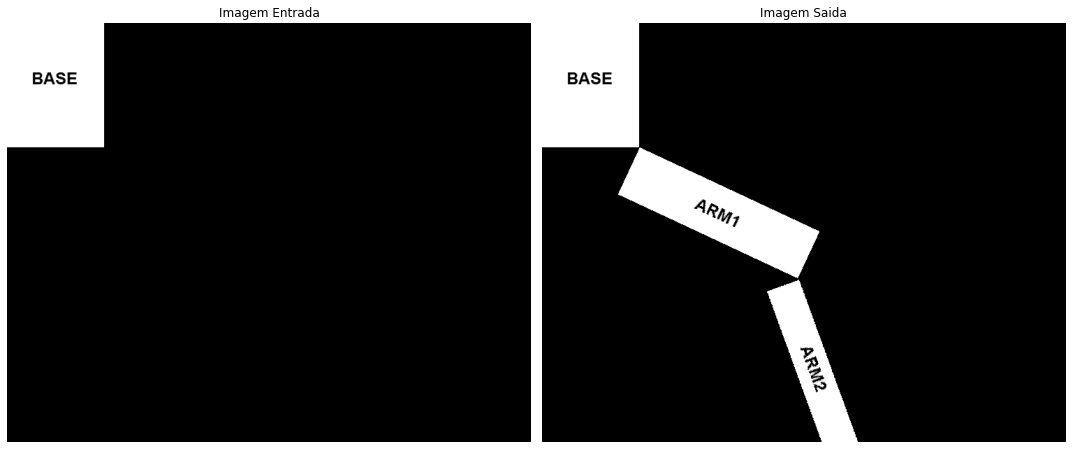

In [216]:
theta2 = 25*np.pi/180
TH2=np.array( [[np.cos(theta2), -np.sin(theta2), 140],
    [np.sin(theta2), np.cos(theta2), 180],
    [0, 0, 1]], dtype = np.float32)

TH_inv_2=np.linalg.inv(TH2)
#Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
Fig_Arm1_Arm2_Base = Fig_Base.copy()
#varredura da imagem
for u in range(wbase): # varrendo as colunas (horizontais), o que corresponde a X
    for v in range(hbase): # varrendo as linhas (verticais), o que corresponde a Y
        p1=np.array([ [u], [v], [1] ]) # montagem do vetor coluna P0 (x,y,1)
        p0=np.matmul(TH_inv_2,p1) # calculo do vetor coluna P1 (u,v,1)
        x=int(p0[0]) 
        y=int(p0[1]) 
        if (x>=0) and (x<wbase) and (y>=0) and (y<hbase):
            Fig_Arm1_Arm2_Base[v,u] = Fig_Arm1_Arm2[y,x] #--> Y e V sao as linhas; X e U sao as colunas

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(Fig_Base, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Fig_Arm1_Arm2_Base, cmap='gray')
plt.title('Imagem Saida')
plt.axis('off')
plt.tight_layout()
plt.show()

In [229]:
data = np.genfromtxt('Robo_Cinematica.csv', delimiter=';')
for k in range(len(data)):
    theta1= data[k][0]*np.pi/180
    TH=np.array( [[np.cos(theta1), -np.sin(theta1), 285],
        [np.sin(theta1), np.cos(theta1), 75],
        [0, 0, 1]], dtype = np.float32)

    TH_inv=np.linalg.inv(TH)
    #Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
    Fig_Arm1_Arm2 = Fig_Arm1.copy()
    #varredura da imagem
    for u in range(wbase): # varrendo as colunas (horizontais), o que corresponde a X
        for v in range(hbase): # varrendo as linhas (verticais), o que corresponde a Y
            p1=np.array([ [u], [v], [1] ]) # montagem do vetor coluna P0 (x,y,1)
            p0=np.matmul(TH_inv,p1) # calculo do vetor coluna P1 (u,v,1)
            x=int(p0[0]) 
            y=int(p0[1]) 
            if (x>=0) and (x<wbase) and (y>=0) and (y<hbase):
                Fig_Arm1_Arm2[v,u] = Fig_Arm2_novo[y,x] #--> Y e V sao as linhas; X e U sao as colunas
    theta2 = data[k][1]*np.pi/180
    TH2=np.array( [[np.cos(theta2), -np.sin(theta2), 140],
        [np.sin(theta2), np.cos(theta2), 180],
        [0, 0, 1]], dtype = np.float32)

    TH_inv_2=np.linalg.inv(TH2)
    #Inicializando a imagem de saida com pixels pretos (0) ou brancos (255)
    Fig_Arm1_Arm2_Base = Fig_Base.copy()
    #varredura da imagem
    for u in range(wbase): # varrendo as colunas (horizontais), o que corresponde a X
        for v in range(hbase): # varrendo as linhas (verticais), o que corresponde a Y
            p1=np.array([ [u], [v], [1] ]) # montagem do vetor coluna P0 (x,y,1)
            p0=np.matmul(TH_inv_2,p1) # calculo do vetor coluna P1 (u,v,1)
            x=int(p0[0]) 
            y=int(p0[1]) 
            if (x>=0) and (x<wbase) and (y>=0) and (y<hbase):
                Fig_Arm1_Arm2_Base[v,u] = Fig_Arm1_Arm2[y,x] #--> Y e V sao as linhas; X e U sao as colunas

    cv2.imshow("Img1 with texts", Fig_Arm1_Arm2_Base)
    cv2.waitKey(20) 
cv2.destroyAllWindows()      

# Questão 4
### Restauração de imagem

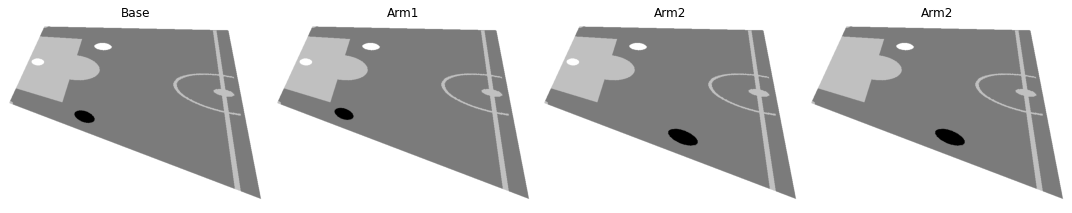

In [279]:
Fig_Campo_1= cv2.imread("Figuras_APS2/Fig4_Campo_Persp1.bmp", cv2.IMREAD_GRAYSCALE)
Fig_Campo_2= cv2.imread("Figuras_APS2/Fig4_Campo_Persp2.bmp", cv2.IMREAD_GRAYSCALE)
Fig_Campo_3= cv2.imread("Figuras_APS2/Fig4_Campo_Persp3.bmp", cv2.IMREAD_GRAYSCALE)
Fig_Campo_4= cv2.imread("Figuras_APS2/Fig4_Campo_Persp4.bmp", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,10))

plt.subplot(1,4,1)
plt.imshow(Fig_Campo_1, cmap='gray')
plt.title('Base')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(Fig_Campo_2, cmap='gray')
plt.title('Arm1')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(Fig_Campo_3, cmap='gray')
plt.title('Arm2')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(Fig_Campo_4, cmap='gray')
plt.title('Arm2')
plt.axis('off')

plt.tight_layout()
plt.show()


[ 1.65623950e+00  7.68111075e-01 -1.75729412e+02 -7.34247225e-02
  3.66389365e+00 -3.28869332e+01  1.72507655e-03  2.39598228e-03]


C:\Users\fekur\AppData\Local\Temp\ipykernel_17668\2922856414.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [Valores_TH[6], Valores_TH[7], 1]], dtype = np.float)


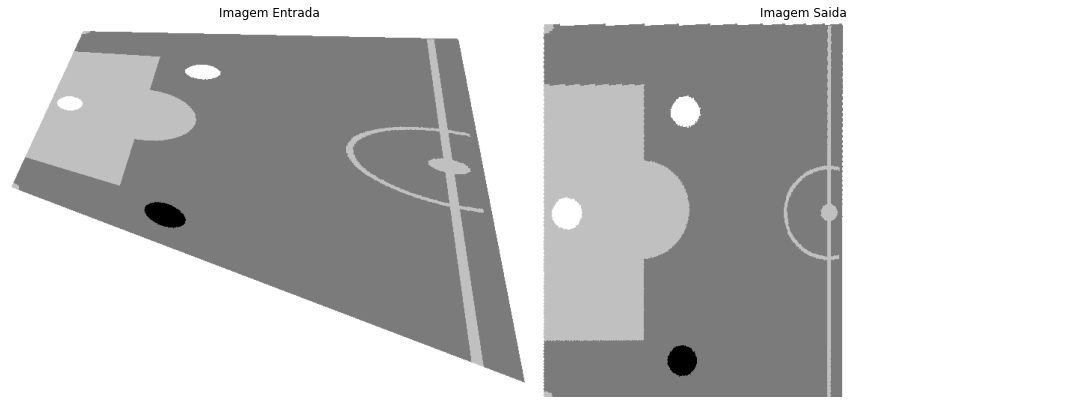

In [297]:
Matriz_XY = [[101,11,1,0,0,0,-101*0,-11*0],
             [600,21,1,0,0,0,-600*400,-21*400],
             [690,478,1,0,0,0,-690*400,-478*400],
             [5,218,1,0,0,0,-5*0,-218*0],
             [0,0,0,101,11,1,-101*0,-11*0],
             [0,0,0,600,21,1,-600*0,-21*0],
             [0,0,0,690,478,1,-690*500,-478*500],
             [0,0,0,5,218,1,-5*500,-218*500]]
Matriz_XY_inv=np.linalg.inv(Matriz_XY)

Matriz_UV = [0,400,400,0,0,0,500,500]

Valores_TH=np.matmul(Matriz_XY_inv,Matriz_UV) # calculo do vetor coluna P1 (u,v,1)

print(Valores_TH)

TH = np.array( [[Valores_TH[0], Valores_TH[1], Valores_TH[2]],
    [Valores_TH[3], Valores_TH[4], Valores_TH[5]],
    [Valores_TH[6], Valores_TH[7], 1]], dtype = np.float)

def TransProject(TH,img):
    (h, w) = img.shape
    TH_inv=np.linalg.inv(TH)
    img_out = np.ones( (h,w), dtype = np.uint8) * 255 
    for u in range(w): # varrendo as colunas (horizontais), o que corresponde a X
        for v in range(h): # varrendo as linhas (verticais), o que corresponde a Y
            p1=np.array([ [u], [v], [1] ]) # montagem do vetor coluna P0 (x,y,1)
            p0=np.matmul(TH_inv,p1) # calculo do vetor coluna P1 (u,v,1)
            x=int(p0[0]/p0[2]) 
            y=int(p0[1]/p0[2]) 
            if (x>=0) and (x<w) and (y>=0) and (y<h):
                img_out[v,u] = img[y,x] #--> Y e V sao as linhas; X e U sao as colunas
    return img_out


plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(Fig_Campo_1, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(TransProject(TH,Fig_Campo_1), cmap='gray')
plt.title('Imagem Saida')
plt.axis('off')
plt.tight_layout()
plt.show()

(-0.5, 389.5, 479.5, -0.5)

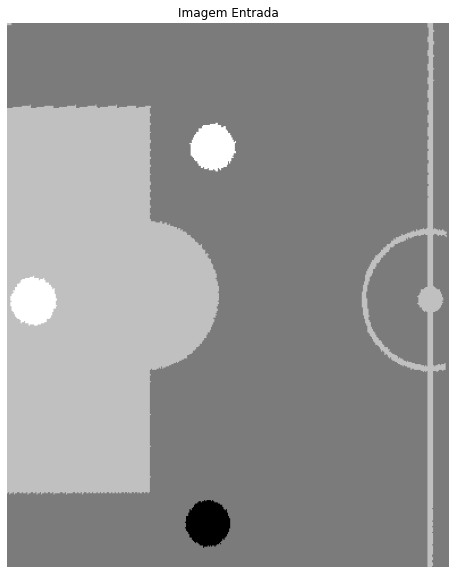

In [281]:
Fig_Campo_1_Pronta = TransProject(TH,Fig_Campo_1)[10:490,10:400]
plt.figure(figsize=(15,10)) 

plt.imshow(Fig_Campo_1_Pronta, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')

In [ ]:
# Linha= None
# for g in range(w):
#     if np.any(Fig_Campo_1_Pronta[:,u]<50):
#         linha = g
#         print(g)

#         break
# print(Linha)

0
None
